In [34]:
import cmocean.cm as cm
import copy
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from salishsea_tools import viz_tools

In [36]:
mycmap = copy.copy(cm.oxy)
mycmap.set_bad('darkgreen')

In [14]:
with xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc') as mesh:
    tmask = mesh.tmask
    mbathy = mesh.mbathy

In [4]:
with xr.open_dataset('/results2/SalishSea/nowcast-green.202111/01apr23/SalishSea_1d_20230401_20230401_chem_T.nc') as data:
    oxy = data['dissolved_oxygen']

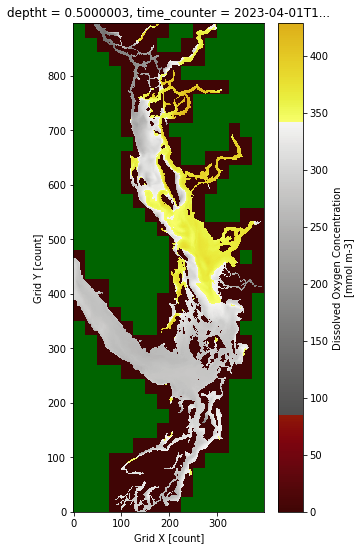

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
oxy[0, 0].plot(ax=ax, cmap=mycmap)
viz_tools.set_aspect(ax);

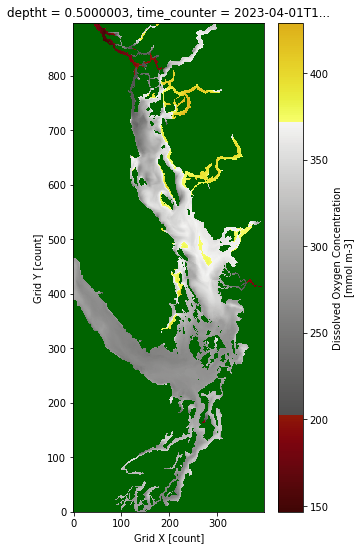

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
oxy[0, 0].where(tmask[0, 0] == 1).plot(ax=ax, cmap=mycmap)
viz_tools.set_aspect(ax);

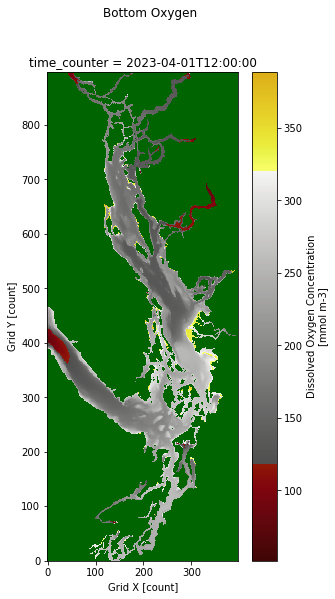

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
oxy[0, mbathy[0, :, :]-1, :, :].where(tmask[0, mbathy[0, :, :]-1, :, :] == 1).plot(ax=ax, cmap=mycmap)
viz_tools.set_aspect(ax);
fig.suptitle('Bottom Oxygen');

In [59]:
tmask2 = tmask.assign_coords(z=("z", oxy.deptht))
tmask2 = tmask2.rename({"z": "deptht"})

In [60]:
print (oxy.deptht)
print (tmask2.deptht)

<xarray.DataArray 'deptht' (deptht: 40)>
array([  0.5     ,   1.500003,   2.500011,   3.500031,   4.500071,   5.500151,
         6.50031 ,   7.500623,   8.501236,   9.502433,  10.504766,  11.509312,
        12.518167,  13.535412,  14.568982,  15.634288,  16.761173,  18.007135,
        19.481785,  21.389978,  24.100256,  28.229916,  34.685757,  44.517723,
        58.484333,  76.58559 ,  98.06296 , 121.866516, 147.08946 , 173.11449 ,
       199.57304 , 226.2603  , 253.06664 , 279.93454 , 306.8342  , 333.75018 ,
       360.67453 , 387.6032  , 414.5341  , 441.4661  ], dtype=float32)
Coordinates:
  * deptht   (deptht) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
Attributes:
    standard_name:  sea_floor_depth
    long_name:      Sea Floor Depth
    units:          metres
    positive:       down
<xarray.DataArray 'deptht' (deptht: 40)>
array([  0.5     ,   1.500003,   2.500011,   3.500031,   4.500071,   5.500151,
         6.50031 ,   7.500623,   8.501236,   9.502433,  10.504766, 

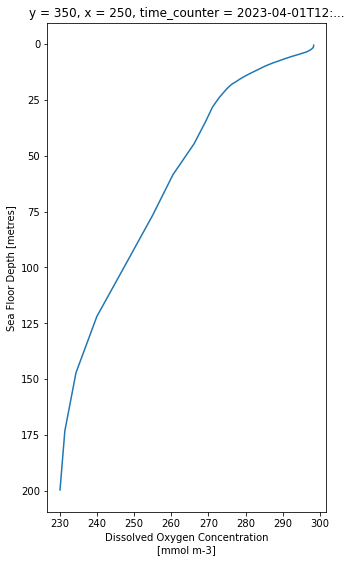

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
myprofile = oxy[0, :, 250:350, 200:300].where(tmask2[0, :, 350, 250] == 1)
myprofile.plot(ax=ax, y="deptht", yincrease=False);

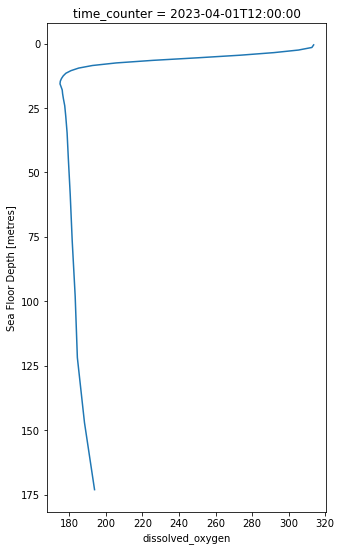

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(5, 9))
myprofile = oxy[0, :, 60:120, 100:160].where(tmask2[0, :, 60:120, 100:160] == 1).mean(axis=1).mean(axis=1)
myprofile.plot(ax=ax, y="deptht", yincrease=False);

In [66]:
import arrow

In [136]:
# Constant and data ranges etc
syear = 2011
eyear = 2011
smonth = 1
emonth = 12
startdate = arrow.get(syear, smonth, 1)
enddate = arrow.get(eyear, emonth, 31)
print (startdate, enddate)

2011-01-01T00:00:00+00:00 2011-12-31T00:00:00+00:00


In [137]:
first = True
for ii, day in enumerate(arrow.Arrow.range('day', startdate, enddate)):
    year = day.year
    yr2 = day.strftime("%y")
    month = day.month
    Month = day.strftime("%b").lower()
    day = day.day
    # set up filename to follow NEMO conventions
    filename = f'/results2/SalishSea/nowcast-green.202111/{day:02}{Month}{yr2}/SalishSea_1d_{year}{month:02}{day:02}_{year}{month:02}{day:02}_chem_T.nc'
    with xr.open_dataset(filename) as ds:
        oxy = ds['dissolved_oxygen'][0, :, 60:120, 100:160].where(tmask2[0, :, 60:120, 100:160] == 1).mean(axis=1).mean(axis=1)
        if first:
            first = False
            oxy_ts = oxy
        else:
            oxy_ts = xr.concat([oxy_ts, oxy], dim='time_counter')

In [130]:
oxy_ts

<xarray.DataArray 'dissolved_oxygen' (time_counter: 2, deptht: 40)>
array([[254.72597, 254.41298, 248.99246, 239.00569, 228.0257 , 214.67719,
        196.6467 , 181.24333, 171.17706, 165.46   , 161.92197, 159.39737,
        157.35037, 155.76399, 154.33734, 153.18968, 152.29651, 151.25984,
        149.96016, 148.48546, 147.26637, 145.90211, 144.80043, 145.3904 ,
        147.42464, 152.60483, 162.1286 , 168.3142 , 178.22913, 188.0295 ,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan],
       [249.66927, 249.7645 , 244.49896, 234.18304, 221.69359, 206.07721,
        186.12527, 170.94402, 163.28227, 159.35753, 157.19745, 155.83968,
        154.8693 , 154.11925, 153.40985, 152.90689, 152.61098, 152.13083,
        151.45894, 150.60872, 149.72943, 148.62788, 146.97601, 146.82654,
        148.27394, 152.64441, 162.00214, 168.37083, 177.87944, 187.19836,
              nan,       nan,       nan,       nan,       nan,       nan,
              nan,       nan,       nan,       nan]], dtype=float32)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2011-01-01T12:00:00 2011-01-0...
  * deptht        (deptht) float32 0.5 1.5 2.5 3.5 ... 360.7 387.6 414.5 441.5

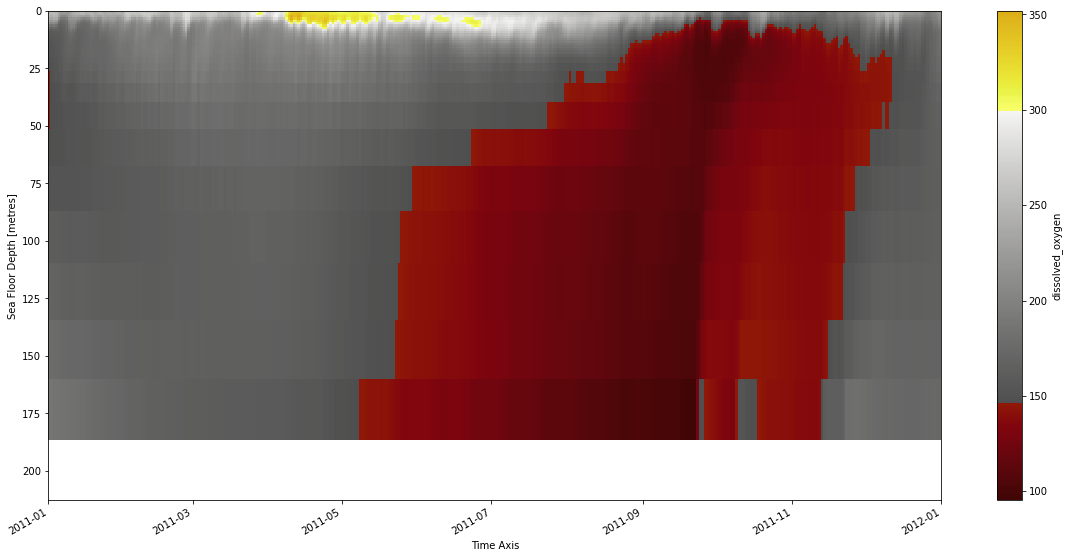

In [138]:
fig, ax = plt.subplots(1, 1, figsize=(20, 9))
oxy_ts[:, :31].plot(ax=ax, y="deptht", yincrease=False, cmap=cm.oxy);